## Functions Below

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
def readTurnstileData(link):
    """
    This function reads in data from an online MTA Turnstile dataset into a DataFrame
    ---
    input: link to dataset
    output: DataFrame
    """
    cols = ['control_area','unit','scp','station','line_name','division','date','time',
        'desc','entries','exits']
    
    turnstile_data = pd.read_csv(link, header = 0, names = cols)
    return turnstile_data

def formatDateTime(df):
    """
    This function converts the date and time into DateTime format in a single column
    and deletes the unformatted date and time columns
    
    Note: only run once per DataFrame, will result in error otherwise
    ---
    input: DataFrame
    output: DataFrame
    """
    
    #convert date and time to DateTime format in a single column
    df['concat_date_time'] = df['date'] + ' ' + df['time']
    df['date_time'] = pd.to_datetime(df.concat_date_time,format = '%m/%d/%Y %H:%M:%S')
    
    #delete unformatted date and time columns
    del df['concat_date_time']
    del df['date']
    del df['time']
    return df

def read_and_format_turnstile_data(link):
    """
    This function reads in Turnstile data from online and returns a DataFrame with 
    with the date and time information converted to a single DateTime column
    ---
    input: link
    output: DataFrame
    """
    df = readTurnstileData(link)
    df1 = formatDateTime(df)
    return df1

In [29]:
def topx(clean_df, x):
    """
    This funciton takes in a clean dataframe of turnstile data and an integer number of top stations 
    requested. It returns the x most visited stations and a plot.
    ---
    input: DataFrame, Integer
    output: DataFrame
    """
    by_station = clean_df.groupby('station')['total_traffic'].sum()
    top_x= by_station.nlargest(x)
    plt.barh(top_x.index, top_x.values)
    top_x_station = clean_df[clean_df['station'].isin(top_x.index)]
    return top_x_station

In [31]:
topx(turnstile_data_2, 5)

KeyError: 'Column not found: total_traffic'

In [25]:
def hoursDays(top_x_station):
    """
    This function takes in a clean dataframe of top stations and returns plots for the
    most visited stations on weekends vs weekdays vs hours of day
    ---
    input: DataFrame
    output: Plots
    """
    top_x_station['weekday'] = [i.dayofweek for i in turnstile_data_2['date_time']]
    by_dow = top_x_station.groupby('weekday')['total_traffic'].sum()
    top_x_station['time_of_day'] = [i.hour for i in top_x_station['date_time']]
    top_x_station['hour_bins'] = pd.cut(top_x_station['time_of_day'], bins=6)
    top_x_station['hour_bins'] = station.groupby('hour_bins').ngroup()
    hours = station.groupby('hour_bins')['total_traffic'].sum()
    plt.bar(hours.index, hours.values)
    plt.bar(by_dow.index, by_dow.values)
    return
    

In [26]:
weekdays(top_x_station)

NameError: name 'top_x_station' is not defined

In [22]:
def readStationData(link):
    """
    This function reads in data from an online MTA station location dataset into a DataFrame
    ---
    input: link to dataset
    output: DataFrame
    """
    station_data = pd.read_csv(link, header = 0) #names = cols)
    drop_cols = ['Complex ID', 'GTFS Stop ID', 'Division', 'Line',
                 'Daytime Routes', 'Structure','North Direction Label', 'South Direction Label']
    station_data = station_data.drop(drop_cols, axis=1)
    return station_data

## Allison Below 

In [61]:
# Read in one of the turnstile datasets
turnstile_data_link_1 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt'
turnstile_data_1 = read_and_format_turnstile_data(turnstile_data_link_1)

In [ ]:
turnstile_data_1.head(50)
# entries and exits are cumulative, subtract previous value to get the number for that 4 hour period


In [51]:
station_groupby = turnstile_data.groupby('station')

In [54]:
station_entries = station_groupby.entries.sum().sort_values(ascending = True)
station_entries

station
NEWARK HM HE            1073019
PATH WTC 2              7402804
NEWARK HW BMEBE        16359580
9TH STREET             18546632
ORCHARD BEACH          20787564
                       ...     
DEKALB AV          226731273077
23 ST              237675376663
TIMES SQ-42 ST     244851205878
125 ST             282278333960
42 ST-PORT AUTH    315905669087
Name: entries, Length: 378, dtype: int64

In [ ]:
turnstile_groupby = turnstile_data.groupby(['station','scp'])

## Brittany Below

## Reading in a dataset from January

I'm messing with the columns to understand

In [30]:
turnstile_data_link_2 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190119.txt'
turnstile_data_2 = read_and_format_turnstile_data(turnstile_data_link_2)

In [8]:
turnstile_data_2.columns

Index(['control_area', 'unit', 'scp', 'station', 'line_name', 'division',
       'desc', 'entries', 'exits', 'date_time'],
      dtype='object')

Data from MTA starts on Saturday (5) and goes through Friday (4) 

(Numbers) refer to DateTime assignments

Assigning a unique turnstile ID number

In [34]:
turnstile_data_2['turn_id'] = turnstile_data_2.groupby(['control_area','unit', 'scp']).ngroup()

In [35]:
turnstile_data_2.head(5)

,control_area,unit,scp,station,line_name,division,desc,entries,exits,date_time,turn_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6905946,2341685,2019-01-12 03:00:00,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6905952,2341693,2019-01-12 07:00:00,0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6906028,2341776,2019-01-12 11:00:00,0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6906223,2341827,2019-01-12 15:00:00,0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6906545,2341897,2019-01-12 19:00:00,0


In [36]:
# Making sure the ngroup() number for turn_id makes sense using a combo of scp, control_area, and unit
turnstile_data_2.nunique()

control_area       742
unit               467
scp                220
station            377
line_name          114
division             6
desc                 2
entries         171194
exits           170691
date_time        13850
turn_id           4815
dtype: int64

Need to get the difference between each turnstile datapoint, because the counters are cummulative 

In [37]:
turnstile_data_2['Entry_Diff'] = turnstile_data_2.groupby(['turn_id']).transform(pd.Series.diff)['entries']

In [38]:
turnstile_data_2['Exit_Diff'] = turnstile_data_2.groupby(['turn_id']).transform(pd.Series.diff)['exits']

In [45]:
turnstile_data_2.head()

,control_area,unit,scp,station,line_name,division,desc,entries,exits,date_time,weekday,turn_id,Entry_Diff,Exit_Diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6905946,2341685,2019-01-12 03:00:00,5,0,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6905952,2341693,2019-01-12 07:00:00,5,0,6.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6906028,2341776,2019-01-12 11:00:00,5,0,76.0,83.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6906223,2341827,2019-01-12 15:00:00,5,0,195.0,51.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6906545,2341897,2019-01-12 19:00:00,5,0,322.0,70.0


In [39]:
turnstile_data_2.groupby(['station', 'weekday'])['Entry_Diff', 'Exit_Diff'].sum()

KeyError: 'weekday'

In [ ]:
turnstile_data_2['total_traffic'] = turnstile_data_2['Entry_Diff'] + turnstile_data_2['Exit_Diff']

In [13]:
turnstile_data_2.columns

Index(['control_area', 'unit', 'scp', 'station', 'line_name', 'division',
       'desc', 'entries', 'exits', 'date_time', 'turn_id', 'Entry_Diff',
       'Exit_Diff', 'total_traffic'],
      dtype='object')

In [14]:
turnstile_data_2_station = turnstile_data_2.groupby('station')['total_traffic'].sum()

<BarContainer object of 377 artists>

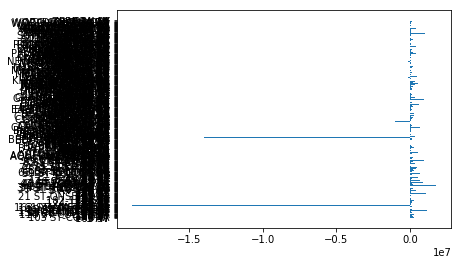

In [63]:
plt.barh(turnstile_data_2_station.index, turnstile_data_2_station.values)

In [64]:
turnstile_data_2_dow = turnstile_data_2.groupby('weekday')['total_traffic'].sum()

<BarContainer object of 7 artists>

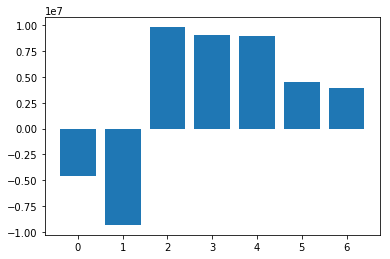

In [66]:
plt.bar(turnstile_data_2_dow.index, turnstile_data_2_dow.values)

I want to plot the top 10 stations

In [68]:
turnstile_data_2_station.head()

station
1 AV             276611.0
103 ST           308202.0
103 ST-CORONA    210827.0
104 ST            25612.0
110 ST           123889.0
Name: total_traffic, dtype: float64

In [15]:
y = turnstile_data_2_station.nlargest(10)

In [16]:
y.index

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ',
       '14 ST-UNION SQ', '23 ST', 'TIMES SQ-42 ST', 'FULTON ST', '86 ST',
       '42 ST-PORT AUTH', '125 ST'],
      dtype='object', name='station')

<BarContainer object of 10 artists>

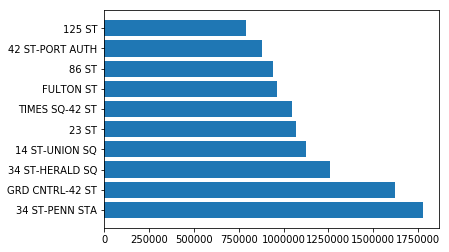

In [74]:
plt.barh(y.index, y.values)

In [28]:
station = turnstile_data_2[turnstile_data_2['station'].isin(y.index)]

Find dow data for 10 most popular stations

In [31]:
station['weekday'] = [i.dayofweek for i in station['date_time']]

/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
station_1 = turnstile_data_2.loc[turnstile_data_2['station'] == '34 ST-PENN STA']
station_2 = turnstile_data_2.loc[turnstile_data_2['station'] == 'GRD CNTRL-42 ST']

In [85]:
values_1 = station_1.groupby('weekday')['total_traffic'].sum()

In [87]:
values_2 = station_2.groupby('weekday')['total_traffic'].sum()

In [32]:
values = station.groupby('weekday')['total_traffic'].sum()

<BarContainer object of 7 artists>

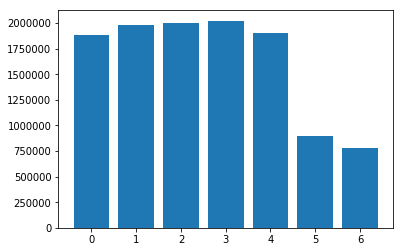

In [33]:
plt.bar(values.index, values.values)

<BarContainer object of 7 artists>

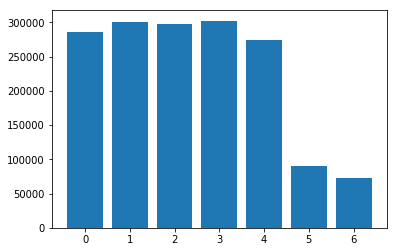

In [88]:
plt.bar(values_2.index, values_2.values)

In [89]:
station_3 = turnstile_data_2.loc[turnstile_data_2['station'] == 'TIMES SQ-42 ST']
values_3 = station_2.groupby('weekday')['total_traffic'].sum()

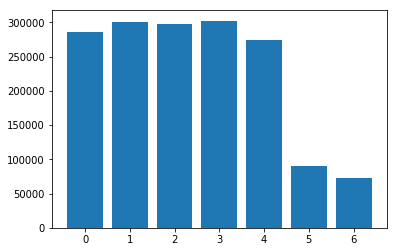

In [91]:
plt.bar(values_3.index, values_3.values);

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ',
       '14 ST-UNION SQ', '23 ST', 'TIMES SQ-42 ST', 'FULTON ST', '86 ST',
       '42 ST-PORT AUTH', '125 ST'],
      dtype='object', name='station')

In [56]:
dow = []
for day in turnstile_data_2['weekday']:
    if (day == 5) or (day == 6):
        dow.append('weekend')
    else:
        dow.append('weekday')
turnstile_data_2['dow'] = dow

In [43]:
turnstile_data_2['time_of_day'] = [i.hour for i in turnstile_data_2['date_time']]

In [44]:
turnstile_data_2['hour_bins'] = pd.cut(turnstile_data_2['time_of_day'], bins=6)

In [98]:
turnstile_data_2.nunique()

control_area        742
unit                467
scp                 220
station             377
line_name           114
division              6
desc                  2
entries          171194
exits            170691
date_time         13850
weekday               7
turn_id            4815
Entry_Diff         2681
Exit_Diff          2544
total_traffic      3368
dow                   2
time_of_day          24
hour_bins             4
dtype: int64

In [102]:
hours_1

hour_bins
(-0.023, 5.75]     56402.0
(5.75, 11.5]      528403.0
(11.5, 17.25]     425066.0
(17.25, 23.0]     766673.0
Name: total_traffic, dtype: float64

In [47]:
station['hour_bins'] = station.groupby('hour_bins').ngroup()

/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 6 artists>

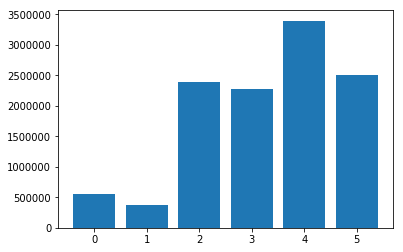

In [48]:
hours_1 = station.groupby('hour_bins')['total_traffic'].sum()
plt.bar(hours_1.index, hours_1.values)

In [ ]:
x = turnstile_data_2.groupby([''['total_traffic']

In [ ]:
plt.plot()